<a href="https://colab.research.google.com/github/Alifbhanvadiya14/Machine_Learning/blob/master/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Given Problem Statement**
  
Context:

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This  will increase the
success ratio while at the same time reduce the cost of the campaign.



*   **Attribute Information:**

ID: Customer ID
 
Age: Customer's age in completed years

Experience: #years of professional experience

Income: Annual income of the customer ($000)

ZIP Code: Home Address ZIP code.

Family: Family size of the customer

CCAvg: Avg. spending on credit cards per month ($000)

Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

Mortgage: Value of house mortgage if any. ($000)

Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

Securities Account: Does the customer have a securities account with the bank?

CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

Online: Does the customer use internet banking facilities?

Credit card: Does the customer use a credit card issued by the bank?











**Uploading the dataset**



In [4]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


**1. Importing Libraries**

In [5]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# reading the dataset
dataset = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name = "Data")

In [7]:
# displaying the top 10 rows
dataset.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [8]:
# displaying the bottom 10 rows
dataset.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


**1.2 Checking the data types and basic summary stats**

In [9]:
# display the information and data types of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
# Shape of given dataset
dataset.shape

(5000, 14)

In [11]:
# Gives the summmary stats of dataset which includes count,std,mean,....
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
#  checking for the null values
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64



*  From the above information, we can say that there no null values in the dataset



**2. Dropping Irrelevant columns**

In this dataset, Id column has no affect on loan prediction as it only reflects unique id of customers. Moreover, Experience columns seems to have negative value, so I will drop this column as it seems highly correlated with age column

In [13]:
experience = dataset['Experience']
age = dataset['Age']
correlation = experience.corr(age)
correlation

0.9942148569683321

In [14]:
dataset = dataset.drop(['ID','Experience'],axis = 1)
dataset.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


**3. Explorartory Data Analysis**

**3.1 Number of unique in each column**

In [15]:
dataset.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [16]:
# Dropping zipcode column
dataset.drop('ZIP Code', axis=1 ,inplace = True)

In [17]:
dataset.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


**3.2  Number of people with zero mortgage**

In [18]:
# There are 3462 people with 0 mortage
(dataset.Mortgage == 0).sum()

3462

**3.3 Number of people with zero credit card spending per month**

In [19]:
(dataset.CCAvg == 0).sum()

106

**3.4 Value counts of all categorical columns.**
    
   List of categorical columns

      Family
      Education
      Securities Account
      CD Account
      Online 
      Credit Card


In [20]:
dataset['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [21]:
dataset['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [22]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [23]:
# 1470 customers have credit card while 3530 doesnot have it
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [24]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [25]:
#2984 customers avails the internet facilities provided by Bank while 2016 does not avails
dataset['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**3.4 Univariate Analysis**

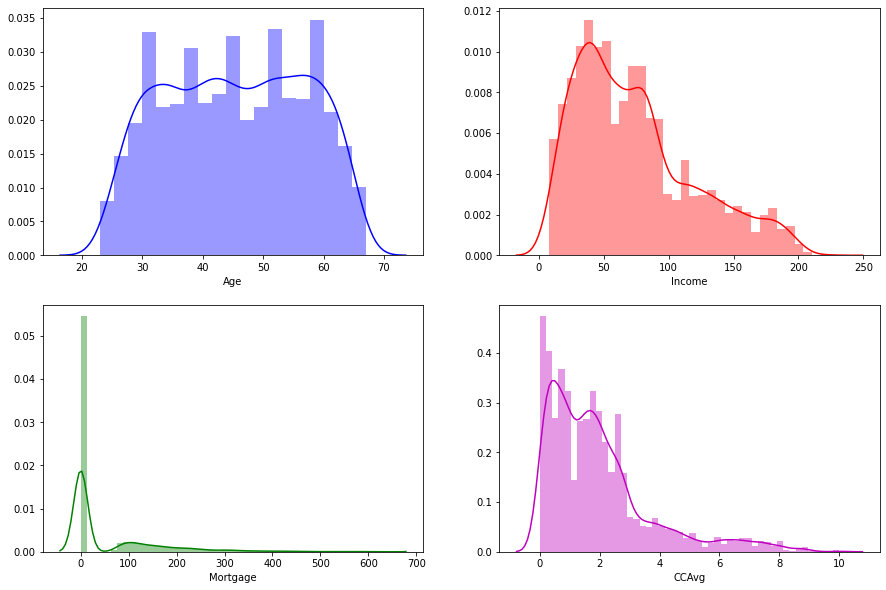

In [26]:
f, axes = plt.subplots(2, 2, figsize = (15,10))

sns.distplot(dataset['Age'] ,color= 'b', ax=axes[0,0])
sns.distplot(dataset['Income'] ,color='r', ax=axes[0,1])
sns.distplot(dataset['Mortgage'] , color='g',ax=axes[1,0])
sns.distplot(dataset['CCAvg'] , color = 'm',ax=axes[1,1])

From the above plots, only age has symmetric distribution while Income, Mortgage, CCAvg have Right skewed distribution

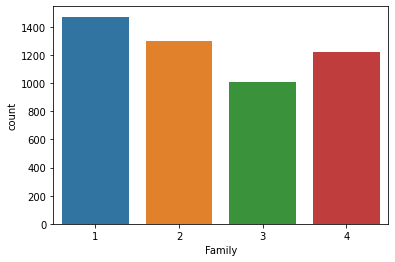

In [27]:
sns.countplot(dataset.Family)

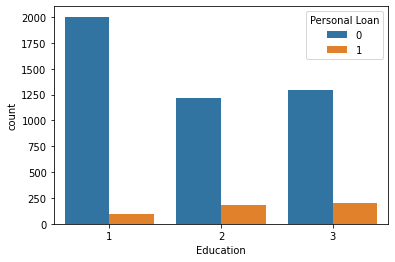

In [34]:
# Customers pursuing Advanced/Professional Education have been granted loan 
sns.countplot(x = "Education",data=dataset, hue="Personal Loan")

**3.5 Multivariate Analysis**

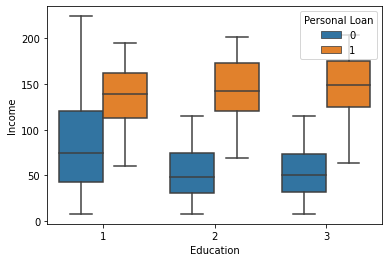

In [29]:
# customers having more income have been granted loan
sns.boxplot(x="Education",y="Income",data=dataset,hue="Personal Loan")

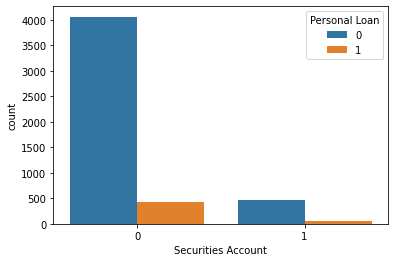

In [35]:
# Customers having personal Loan doesn't have Securitites Account
sns.countplot(x = "Securities Account",hue="Personal Loan", data=dataset)

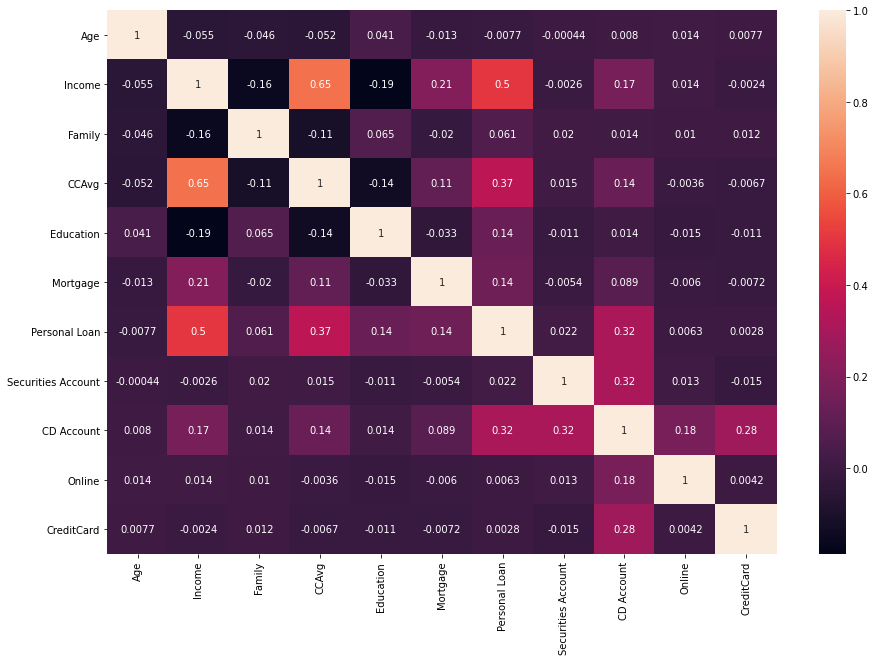

In [36]:
# From Below heatmap of correlation, there doesn't seems to have any significant correlation except CCAvg, Income and Securities Account   
plt.figure(figsize = (15,10))
sns.heatmap(dataset.corr(), annot= True)

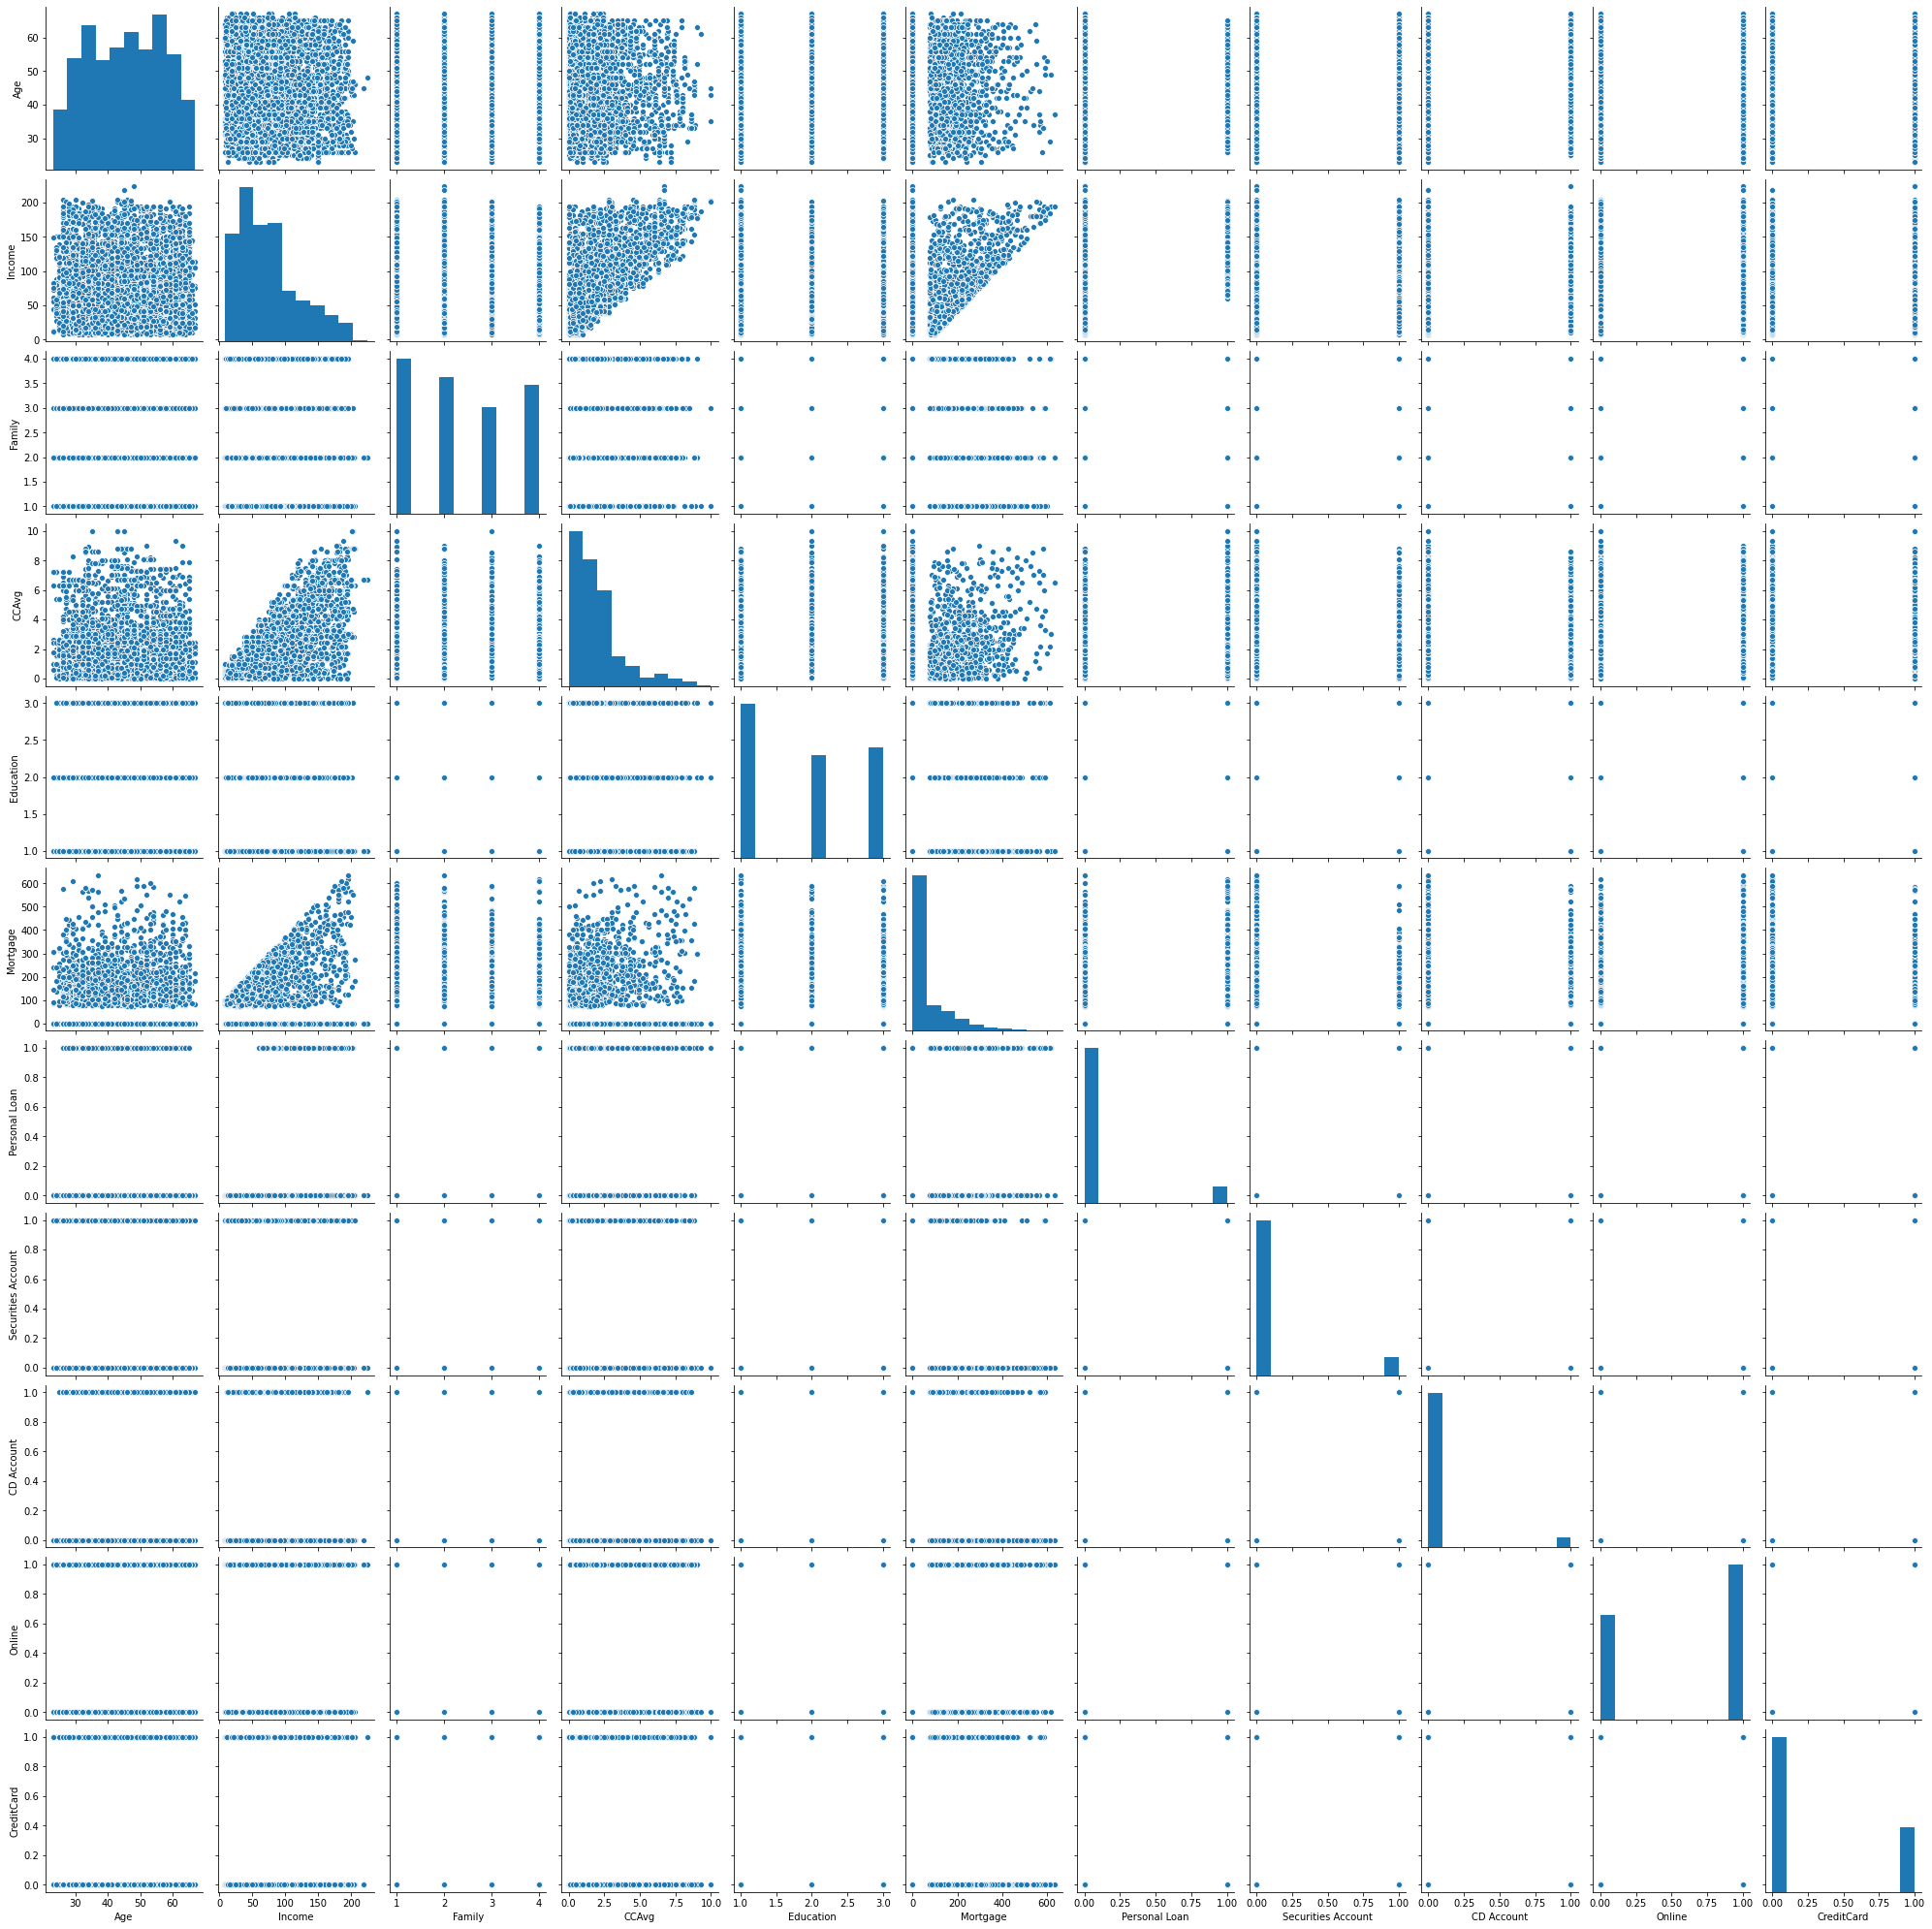

In [37]:
sns.pairplot(dataset)

In [50]:
# splitting the dataset
data_X = dataset.loc[:, dataset.columns != 'Personal Loan']
data_Y = dataset[['Personal Loan']]


**4. Transformation of feature variable**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


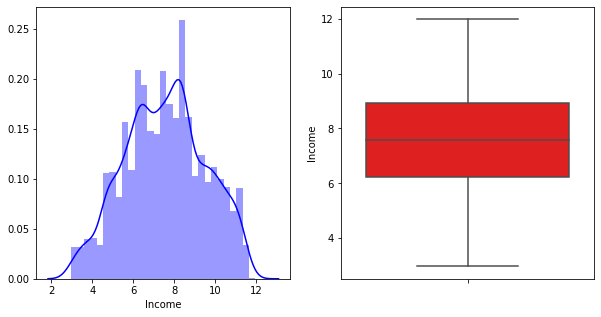

In [51]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = "yeo-johnson", standardize = False)
pt.fit(data_X['Income'].values.reshape(-1,1))
income = pt.transform(data_X['Income'].values.reshape(-1,1))
data_X['Income'] = income

# subploting to check distribution and outlier
f, axes = plt.subplots(1, 2, figsize = (10,5))

sns.distplot(data_X['Income'] ,color= 'b', ax=axes[0])
sns.boxplot(data_X['Income'] ,orient= 'v',color='r', ax=axes[1])

# Now the income coulmn is balanaced

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


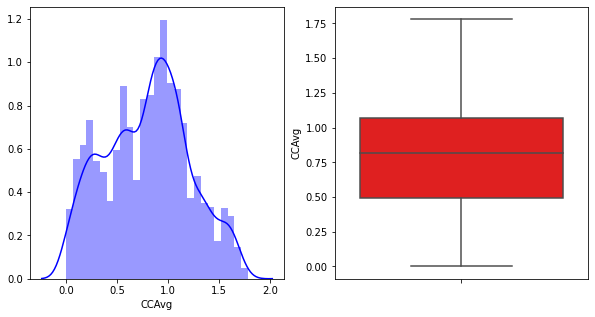

In [52]:
pt = PowerTransformer(method = "yeo-johnson", standardize = False)
pt.fit(data_X['CCAvg'].values.reshape(-1,1))
temp = pt.transform(data_X['CCAvg'].values.reshape(-1,1))

data_X['CCAvg'] = temp

# subploting to check distribution and outlier
f, axes = plt.subplots(1, 2, figsize = (10,5))

sns.distplot(data_X['CCAvg'] ,color= 'b', ax=axes[0])
sns.boxplot(data_X['CCAvg'] ,orient= 'v',color='r', ax=axes[1])

# Now there CCAvg column is also balanaced

In [53]:
data_X['Mortgage_Int'] = pd.cut(data_X['Mortgage'], bins = [0,100,200,300,400,500,600,700],
                             labels = [0,1,2,3,4,5,6],
                             include_lowest = True)
data_X.drop("Mortgage", axis=1, inplace = True)


In [54]:
data_X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,6.827583,4,0.845150,1,1,0,0,0,0
1,45,5.876952,3,0.814468,1,1,0,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,1,0


**5. Splitting the dataset**

In [55]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_data = std_scaler.fit_transform(data_X)


In [56]:
# Splitting the data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X_data,data_Y, test_size = 0.3, stratify = data_Y, random_state = 42)

In [57]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(3500, 10)
(3500, 1)
(1500, 10)
(1500, 1)


**6 Training the model**

In [58]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier


In [59]:
log_class = LogisticRegression(random_state = 42)
tree_class = DecisionTreeClassifier(random_state = 42, max_depth=8)
rf_class = RandomForestClassifier(random_state = 42, n_estimators = 500, max_depth=8)

In [60]:
# training Logistic regression model

log_class.fit(X_train, Y_train)
pred1_test_X = log_class.predict(X_test)
pred1_train_X = log_class.predict(X_train)
acc1_train_X = accuracy_score(Y_train, pred1_train_X)
acc1_test_X = accuracy_score(Y_test, pred1_test_X)

print("Logistic Regression accuracy on X_train is {:.4f}".format(acc1_train_X))
print("Logistic Regression accuracy on X_test is {:.4f}".format(acc1_test_X))

Logistic Regression accuracy on X_train is 0.9551
Logistic Regression accuracy on X_test is 0.9587


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
# training Decision Tree model

tree_class.fit(X_train, Y_train)
pred2_test_X = tree_class.predict(X_test)
pred2_train_X = tree_class.predict(X_train)
acc2_train_X = accuracy_score(Y_train, pred2_train_X)
acc2_test_X = accuracy_score(Y_test, pred2_test_X)

print("Decision Tree accuracy on X_train is {:.4f}".format(acc2_train_X))
print("Decision Tree accuracy on X_test is {:.4f}".format(acc2_test_X))

Decision Tree accuracy on X_train is 0.9934
Decision Tree accuracy on X_test is 0.9800


In [64]:
# training Random Forest model

rf_class.fit(X_train, Y_train)
pred3_test_X = rf_class.predict(X_test)
pred3_train_X = rf_class.predict(X_train)
acc3_train_X = accuracy_score(Y_train, pred3_train_X)
acc3_test_X = accuracy_score(Y_test, pred3_test_X)

print("Random Forest accuracy on X_train is {:.4f}".format(acc3_train_X))
print("Random Forest accuracy on X_test is {:.4f}".format(acc3_test_X))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest accuracy on X_train is 0.9946
Random Forest accuracy on X_test is 0.9887


**7.  Metrics related for evaluating the model performance**

In [65]:
# function to get confusion matrix
def draw_cf( actual, predicted ):
  cn = confusion_matrix( actual, predicted)
  sns.heatmap(cn, annot =True, fmt = '.2f', xticklabels = [0,1], yticklabels = [0,1])
  plt.xlabel("Predicted")
  plt.ylabel("Observed")
  plt.show()

Necessary Metrics for Logistic Regression

Confusion Matrix


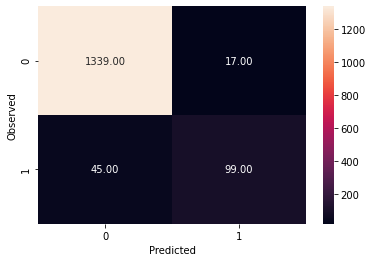

None


In [66]:
print("Confusion Matrix")
print(draw_cf(Y_test, pred1_test_X))

In [67]:
# printing the necessary metrics
print("Recall ",recall_score(Y_test, pred1_test_X))
print()
print("Precision ",precision_score(Y_test, pred1_test_X))
print()
print("F1 score ",f1_score(Y_test, pred1_test_X))
print()
print("ROC-AUC-Score ",roc_auc_score(Y_test, pred1_test_X))
print()


Recall  0.6875

Precision  0.853448275862069

F1 score  0.7615384615384615

ROC-AUC-Score  0.8374815634218289



Necessary Metrics for Decision Tree

Confusion Matrix


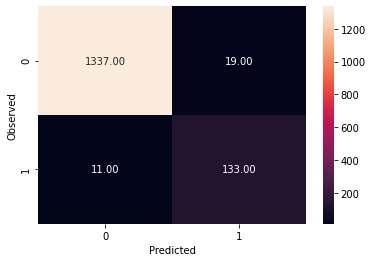

None


In [68]:
print("Confusion Matrix")
print(draw_cf(Y_test, pred2_test_X))

In [69]:
# printing the necessary metrics
print("Recall ",recall_score(Y_test, pred2_test_X))
print()
print("Precision ",precision_score(Y_test, pred2_test_X))
print()
print("F1 score ",f1_score(Y_test, pred2_test_X))
print()
print("ROC-AUC-Score ",roc_auc_score(Y_test, pred2_test_X))
print()

Recall  0.9236111111111112

Precision  0.875

F1 score  0.8986486486486487

ROC-AUC-Score  0.9547996558505408



Necessary Metrics for Random Forest 

Confusion Matrix


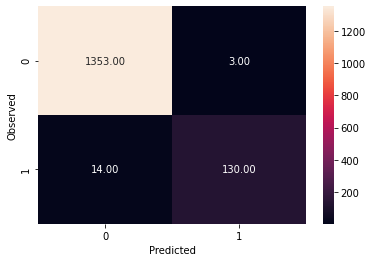

None


In [70]:
print("Confusion Matrix")
print(draw_cf(Y_test, pred3_test_X))

In [71]:
# printing the necessary metrics
print("Recall ",recall_score(Y_test, pred3_test_X))
print()
print("Precision ",precision_score(Y_test, pred3_test_X))
print()
print("F1 score ",f1_score(Y_test, pred3_test_X))
print()
print("ROC-AUC-Score ",roc_auc_score(Y_test, pred3_test_X))
print()

Recall  0.9027777777777778

Precision  0.9774436090225563

F1 score  0.9386281588447652

ROC-AUC-Score  0.9502826941986233



**8. Business understanding of the model**

    From the given dataset, we get the following insights:


*   From given dataset, we have to predict the customers has accepted loan offer or not.
*   From data preprocessing, we found some columns doesnot have any affect on the loan prediction. Therefor we have drop that columns**('ID','Experience','Zip Code')**

*   Further by plotting the plots of various columns, we get to know that **['Income','CCAvg','Mortgage']** seems to have right skewed distribution and contains outliers.
*   We further did data transformation using **PowerTranformer** to make dataset symmetric distribution and remove outliers.

*   From heatmap of correlation of data, there seem to have **correlation between** **Income,CCAvg,Securities Account with target variable ['Personal Loan']**
*   As the dataset was not normalized, we use **Standard Scaler** to make the data normalized.

*   Further we trained the dataset using three models: **Logistic Regression,Decision Tree and Random Forest.**
*   From the trained models, we got to know that **Random Forest model** seems to be good as it has less **False Negative** **in Confusion Matrix** and has good score of **ROC_AUC_SCORE, F1_SCORE, Precision and Recall.**








